# Planet OS API demo for SWAN model

This page demonstrates possible simplified use case for http://data.planetos.com/datasets/pacioos_swan_oahu:simulating-waves-nearshore-swan-regional-wave-model-oahu

For questions and feedback, please use the chat window on http://data.planetos.com page. 

For general information on the API usage, please refer to http://data.planetos.com/guide


For general information on usage of IPython/Jupyter and Matplotlib, please refer to their corresponding documentation. https://ipython.org/ and http://matplotlib.org/
Note: use python3 or change urllib commands for python2.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import dateutil.parser
import datetime
from urllib.request import urlopen, Request
import simplejson as json

Select location. Beware that this model has small spatial coverage and requests to outside the model domain will not return any data.

In [2]:
location = 'Hawaii Oahu'
if location == 'Est':
    longitude = 24.+45./60
    latitude = 59+25/60.
elif location == 'Au':
    longitude = 149. + 7./60
    latitude = -35.-18./60
elif location == "Hawaii Oahu":
    latitude = 21.205
    longitude = -158.35
apikey = ''

In [3]:
API_url = "http://api.planetos.com/v1/datasets/pacioos_swan_oahu/point?lon={0}&lat={1}&count=1000&verbose=false&apikey={2}".format(longitude,latitude,apikey)
print(API_url)
request = Request(API_url)
response = urlopen(request)
API_data = json.loads(response.read())

http://api.planetos.com/v1/datasets/pacioos_swan_oahu/point?lon=-158.35&lat=21.205&count=1000&verbose=false&apikey=d7d0466b16e24b7084d0c97ea8343762


In [4]:
print("{0:<50} {1}".format("Variable","Context"))
print()
for k,v in set([(j,i['context']) for i in API_data['entries'] for j in i['data'].keys()]):
    print("{0:<50} {1}".format(k,v))

Variable                                           Context

mper                                               reference_time_time_z_lat_lon
pdir                                               reference_time_time_z_lat_lon
mdir                                               reference_time_time_z_lat_lon
time_offset                                        reference_time_time
shgt                                               reference_time_time_z_lat_lon
pper                                               reference_time_time_z_lat_lon


In [5]:
reftimes = set()
for i in API_data['entries']:
    reftimes.update([i['axes']['reftime']])
reftimes=list(reftimes)
if len(reftimes)>1:
    reftime = reftimes[0] if dateutil.parser.parse(reftimes[0])<dateutil.parser.parse(reftimes[1]) else reftimes[1]
else:
    reftime = reftimes[0]

In [6]:
reftime

'2016-04-16T00:00:00'

In [7]:
varlist = ['mdir','mper','pdir','shgt','pper']

In [8]:
vardict = {}
for i in varlist:
    vardict['time_'+i]=[]
    vardict['data_'+i]=[]
for i in API_data['entries']:
    #print(i['context'])
    if i['context'] == 'reference_time_time_z_lat_lon' and i['axes']['reftime']==reftime:
        for j in i['data']:
            vardict['data_'+j].append(i['data'][j])
            vardict['time_'+j].append(dateutil.parser.parse(i['axes']['time']))

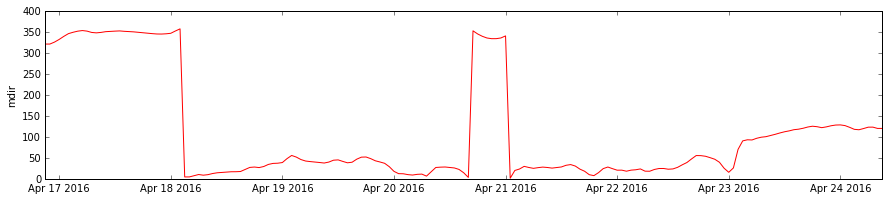

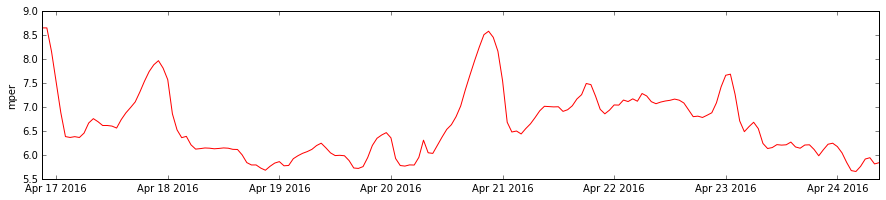

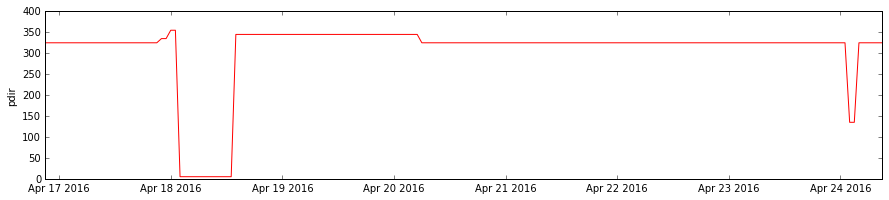

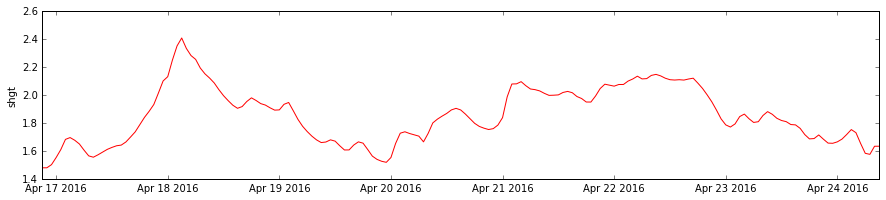

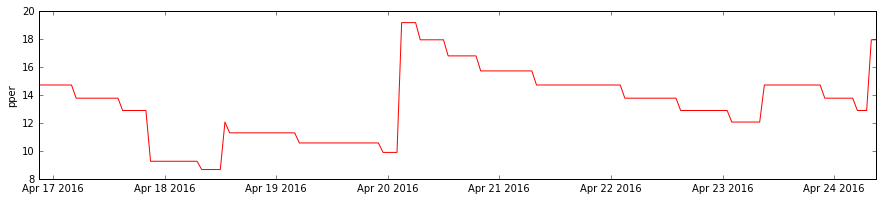

In [9]:
for i in varlist:
    fig = plt.figure(figsize=(15,3))
    ax = fig.add_subplot(111)
    plt.plot(vardict['time_'+i],vardict['data_'+i],color='r')
    ax.set_ylabel(i)